# Week 7 - Josh

## Part 1

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Code_Complaints_and_Violations.csv")

In [4]:
df

,RecordNum,RecordType,RecordTypeMapped,RecordTypeDesc,Description,OpenDate,LastInspDate,LastInspResult,StatusCurrent,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,Link,Latitude,Longitude,Location1
0,001001-03CP,Complaint,Request,Construction,"Elevator gets stuck at least 3 times a week, f...",2003-11-10,POINT (-122.33582172 47.60642293),Completed,Completed,1100 2ND AVE,SEATTLE,WA,98101.0,https://cosaccela.seattle.gov/portal/customize...,47.606423,-122.335822,"(47.60642293, -122.33582172)"
1,001002-03CP,Complaint,Request,Construction,Concerned about RV pumpout that is currently b...,2003-11-10,POINT (-122.35191884 47.68639169),Completed,Completed,512 N 79TH ST,SEATTLE,WA,98103.0,https://cosaccela.seattle.gov/portal/customize...,47.686392,-122.351919,"(47.68639169, -122.35191884)"
2,001003-03CP,Complaint,Request,Vacant Building,The vacant red apple building and adjacent bui...,2003-11-10,POINT (-122.31388805 47.61559829),Completed,Completed,1400 E PINE ST,SEATTLE,WA,98122.0,https://cosaccela.seattle.gov/portal/customize...,47.615598,-122.313888,"(47.61559829, -122.31388805)"
3,001004-03CP,Complaint,Request,Land Use,Trailor and camper parked in back yard. Peopl...,2003-11-10,POINT (-122.36215164 47.69226044),Completed,Completed,332 NW 87TH ST,SEATTLE,WA,98117.0,https://cosaccela.seattle.gov/portal/customize...,47.692260,-122.362152,"(47.69226044, -122.36215164)"
4,001005-03CP,Complaint,Request,Land Use,"Illegal use of property.""Hawkers"" or vendors (...",2003-11-10,POINT (-122.33832038 47.60911773),Completed,Completed,1430 2ND AVE,SEATTLE,WA,98101.0,https://cosaccela.seattle.gov/portal/customize...,47.609118,-122.338320,"(47.60911773, -122.33832038)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188125,004881-23CP,Complaint,Request,LandLord/Tenant,NOTICE OF INTENT TO ENTERAND PRESUMED ABANDONMENT,2023-05-10,POINT (-122.34702054 47.73157296),NaN,Under Investigation,14100 LINDEN AVE N,SEATTLE,WA,98133.0,https://cosaccela.seattle.gov/portal/customize...,47.731573,-122.347021,"(47.73157296, -122.34702054)"
188126,1055984-VI,Notice of Violation,Case,NaN,"COMPLY OR VACATEMOLD, CEILING LEAKPER PIPE PRO...",2023-05-10,POINT (-122.34224721 47.61513867),NaN,Initiated,420 BLANCHARD ST,SEATTLE,WA,98121.0,https://cosaccela.seattle.gov/portal/customize...,47.615139,-122.342247,"(47.61513867, -122.34224721)"
188127,004882-23CP,Complaint,Request,NaN,The person residing at 1235 S. Donovan Street ...,2023-05-10,POINT (-122.31613662 47.52543336),NaN,Initiated,1235 S DONOVAN ST,SEATTLE,WA,98108.0,https://cosaccela.seattle.gov/portal/customize...,47.525433,-122.316137,"(47.52543336, -122.31613662)"
188128,004883-23CP,Complaint,Request,NaN,The General contractor Iliya Kovalev doesn't w...,2023-05-10,POINT (-122.39165973 47.68630858),NaN,Initiated,7744 EARL AVE NW,SEATTLE,WA,98117.0,https://cosaccela.seattle.gov/portal/customize...,47.686309,-122.391660,"(47.68630858, -122.39165973)"


In [9]:
print(f"We're looking at {df.shape[0]} rows, {df.shape[1]} columns")

We're looking at 188130 rows, 17 columns


## Part 2

### 2.1

In [13]:
df["RecordType"].value_counts()

Complaint              137119
Notice of Violation     28459
Citation                18597
Tenant Relocation        3639
Unfit Building            316
Name: RecordType, dtype: int64

<Axes: >

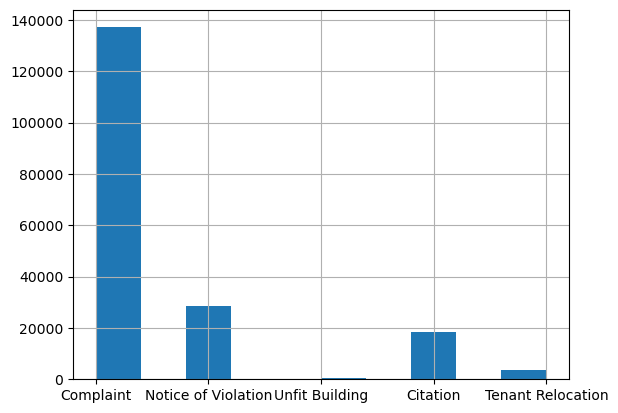

In [15]:
df["RecordType"].hist()

In [43]:
# Here's a "fun one-liner":
(df                                   # Start with the dataframe
    .groupby("RecordType")            # Group according to RecordType...
    .head()                           # ...and then grab a few rows in each group
     [["RecordType", "Description"]]  # Pick out the two columns we care about
    .sort_values("RecordType")        # And sort by RecordType
)

,RecordType,Description
487,Citation,Parking pick-up truck in required front yard -...
482,Citation,Parking a vehicle in the required front yard -...
481,Citation,observed hbmc violations
472,Citation,Parking in req'd yard and unpermitted outdoor ...
485,Citation,"Observed viol, inops, junk and parking."
0,Complaint,"Elevator gets stuck at least 3 times a week, f..."
4,Complaint,"Illegal use of property.""Hawkers"" or vendors (..."
3,Complaint,Trailor and camper parked in back yard. Peopl...
2,Complaint,The vacant red apple building and adjacent bui...
1,Complaint,Concerned about RV pumpout that is currently b...


In [44]:
# Less magical?
for record_type in df["RecordType"].unique():
    print(f"***{record_type}***")
    matching_rows = df[df["RecordType"] == record_type]
    for _, row in matching_rows.head().iterrows():
        print(row["Description"])
    print()

***Complaint***
Elevator gets stuck at least 3 times a week, feels it is a danger.  Wants to keep a low profile, but will live name and number for contact.  Works on the 5th floor of WAMU building.
Concerned about RV pumpout that is currently being installed.  Too close to property line and concerned someone will be living in trailer in SF zone.
The vacant red apple building and adjacent building on lot are now the home to several homeless people.  The grounds are littered with beer bottles. Smell of urine all over property. Graffiti on building.  Fence surrounding building is frequently moved so people can get in and out of the premises.
Trailor and camper parked in back yard.  People living in them.
Illegal use of property."Hawkers" or vendors (retail sales) set up in parking lot.

***Notice of Violation***
nan
Someone living in camper in northeast corner of car wash.
Work w/o permit.Windows being replaced on the Hip Sing Building (418-422 8th Ave. S.) without International Special R

### 2.2

In [79]:
df22 = df[["RecordType", "OriginalZip", "Description"]]

In [80]:
df22

,RecordType,OriginalZip,Description
0,Complaint,98101.0,"Elevator gets stuck at least 3 times a week, f..."
1,Complaint,98103.0,Concerned about RV pumpout that is currently b...
2,Complaint,98122.0,The vacant red apple building and adjacent bui...
3,Complaint,98117.0,Trailor and camper parked in back yard. Peopl...
4,Complaint,98101.0,"Illegal use of property.""Hawkers"" or vendors (..."
...,...,...,...
188125,Complaint,98133.0,NOTICE OF INTENT TO ENTERAND PRESUMED ABANDONMENT
188126,Notice of Violation,98121.0,"COMPLY OR VACATEMOLD, CEILING LEAKPER PIPE PRO..."
188127,Complaint,98108.0,The person residing at 1235 S. Donovan Street ...
188128,Complaint,98117.0,The General contractor Iliya Kovalev doesn't w...


### 2.3

In [81]:
my_df22 = df22[df22["OriginalZip"] == 98115]

In [82]:
my_counts = my_df22["RecordType"].value_counts()
my_counts

Complaint              7927
Notice of Violation    1624
Citation               1270
Tenant Relocation       178
Unfit Building           19
Name: RecordType, dtype: int64

In [83]:
# for reference...
overall_counts = df["RecordType"].value_counts()
overall_counts

Complaint              137119
Notice of Violation     28459
Citation                18597
Tenant Relocation        3639
Unfit Building            316
Name: RecordType, dtype: int64

In [84]:
# let's do percentages
my_counts / my_counts.sum()

Complaint              0.719459
Notice of Violation    0.147395
Citation               0.115266
Tenant Relocation      0.016155
Unfit Building         0.001724
Name: RecordType, dtype: float64

In [85]:
overall_counts / overall_counts.sum()

Complaint              0.728852
Notice of Violation    0.151273
Citation               0.098852
Tenant Relocation      0.019343
Unfit Building         0.001680
Name: RecordType, dtype: float64

In [86]:
# I think these look really similar.
# Differences are small enough that, idk, could be noise.
# (Or something unimportant.)

### 2.4

In [87]:
my_df22.to_csv("Week 7 - my_df22.tsv", sep="\t", index=False)
# note the "index=False";
#   otherwise you get a pointless unlabelled index column

## Part 3

In [71]:
ts = (df
      .set_index(pd.to_datetime(df["OpenDate"]))
      ["OriginalZip"]
     )
ts

OpenDate
2003-11-10    98101.0
2003-11-10    98103.0
2003-11-10    98122.0
2003-11-10    98117.0
2003-11-10    98101.0
               ...   
2023-05-10    98133.0
2023-05-10    98121.0
2023-05-10    98108.0
2023-05-10    98117.0
2023-05-10        NaN
Name: OriginalZip, Length: 188130, dtype: float64

<Axes: xlabel='OpenDate'>

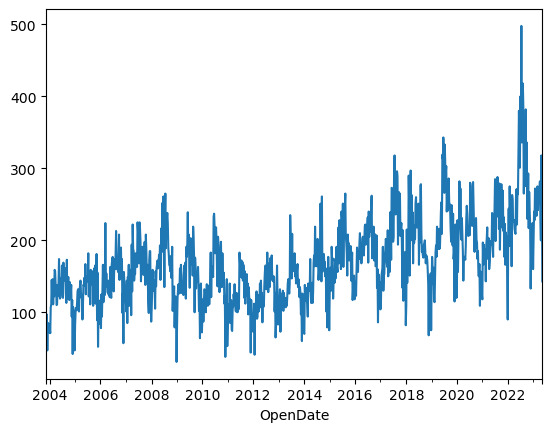

In [76]:
ts.resample("1W").count().plot()

In [77]:
# cool 😎

## 4

Question: Are there different words with different seasonalities?

Plan: Make a list of words that occur in "enough" descriptions. For each word, see if its distribution of monthly occurrences is different "enough" from the overall distribution.

(We'll restrict to "Complaint", for consistency and because they're funnier.)

In [145]:
complaints = (df
              [df["RecordType"] == "Complaint"]
              [["Description", "OpenDate"]]
             )
complaints["OpenDate"] = pd.to_datetime(complaints["OpenDate"])
complaints

,Description,OpenDate
0,"Elevator gets stuck at least 3 times a week, f...",2003-11-10
1,Concerned about RV pumpout that is currently b...,2003-11-10
2,The vacant red apple building and adjacent bui...,2003-11-10
3,Trailor and camper parked in back yard. Peopl...,2003-11-10
4,"Illegal use of property.""Hawkers"" or vendors (...",2003-11-10
...,...,...
188124,Blocked side walk with overgrown vegetation,2023-05-10
188125,NOTICE OF INTENT TO ENTERAND PRESUMED ABANDONMENT,2023-05-10
188127,The person residing at 1235 S. Donovan Street ...,2023-05-10
188128,The General contractor Iliya Kovalev doesn't w...,2023-05-10


First, the overall monthly distribution.

In [135]:
base_rate = complaints["OpenDate"].dt.month.value_counts().sort_index()
base_rate

1      9924
2      9463
3     11582
4     10895
5     12125
6     14117
7     14346
8     14220
9     12406
10    11084
11     8556
12     8401
Name: OpenDate, dtype: int64

In [280]:
i = 0

words = complaints.copy()
words["Word"] = (
    words
    ["Description"]
    .dropna()
    .str.lower()
    .str.findall("[a-z]+")
    .apply(lambda l: set(l))
)
words["Month"] = words["OpenDate"].dt.month
del words["Description"]
del words["OpenDate"]
words = words.explode("Word")
words

,Word,Month
0,profile,11
0,name,11
0,floor,11
0,low,11
0,building,11
...,...,...
188129,new,5
188129,honking,5
188129,stop,5
188129,cannot,5


In [281]:
word_month_counts = words.groupby(['Word','Month']).size()
word_month_counts

Word          Month
a             1        3542
              2        3190
              3        3871
              4        3697
              5        3896
                       ... 
zxhy          12          1
zyku          7           1
zyumwycbqj    7           1
zzxwpqrbzlhp  2           1
zzzz          8           1
Length: 155454, dtype: int64

In [282]:
def word_stats(word):
     return (word_month_counts[word] / base_rate).fillna(0)

<Axes: xlabel='Month'>

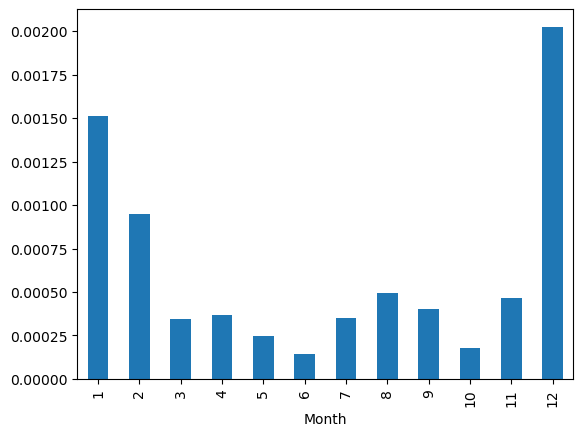

In [283]:
word_stats('ice').plot.bar()

<Axes: xlabel='Month'>

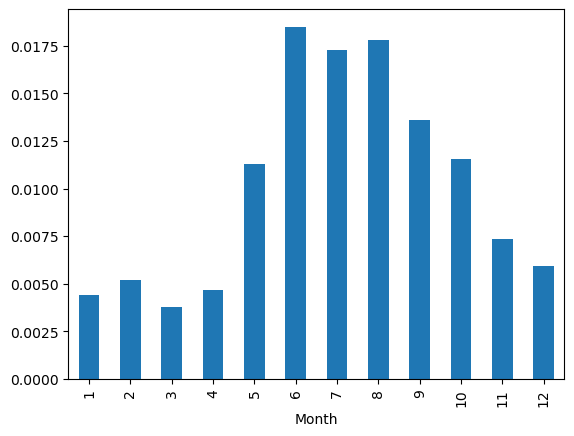

In [284]:
word_stats('blackberry').plot.bar()

In [259]:
# we use polar coordinates to compute seasonality

import numpy as np

angles = 2 * np.pi * np.arange(12) / 12
xs = np.cos(angles)
ys = np.sin(angles)

def seasonality(series):
    norm = series / series.sum()
    x = (norm * xs).sum()
    y = (norm * ys).sum()
    angle = np.arctan2(y, x)
    radius = np.hypot(y,x)
    return (angle, radius)

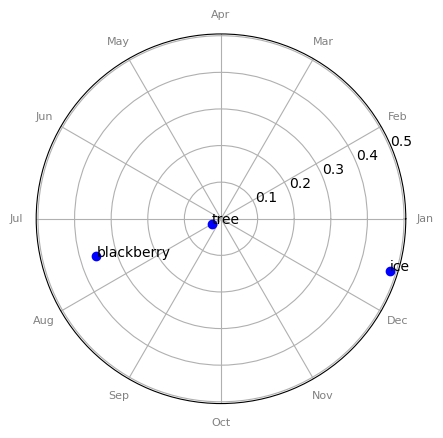

In [260]:
import matplotlib.pyplot as plt
import calendar

ax = plt.subplot(111, polar=True)
plt.xticks(angles, calendar.month_abbr[1:], color='grey', size=8)

for word in ["ice", "blackberry", "tree"]:
    (angle, radius) = seasonality(word_stats(word))
    ax.plot(angle, radius, "bo")
    ax.annotate(word, (angle, radius))

plt.show()

In [286]:
word_counts = word_month_counts.groupby(level=0).sum()
word_counts

Word
a               44677
aa                 50
aaa                 5
aaae                1
aaaufaowblda        1
                ...  
zxhy                1
zyku                1
zyumwycbqj          1
zzxwpqrbzlhp        1
zzzz                1
Length: 47998, dtype: int64

In [317]:
common_words = list(word_counts[word_counts >= 50].index)
len(common_words)

3832

In [318]:
# pip install adjustText

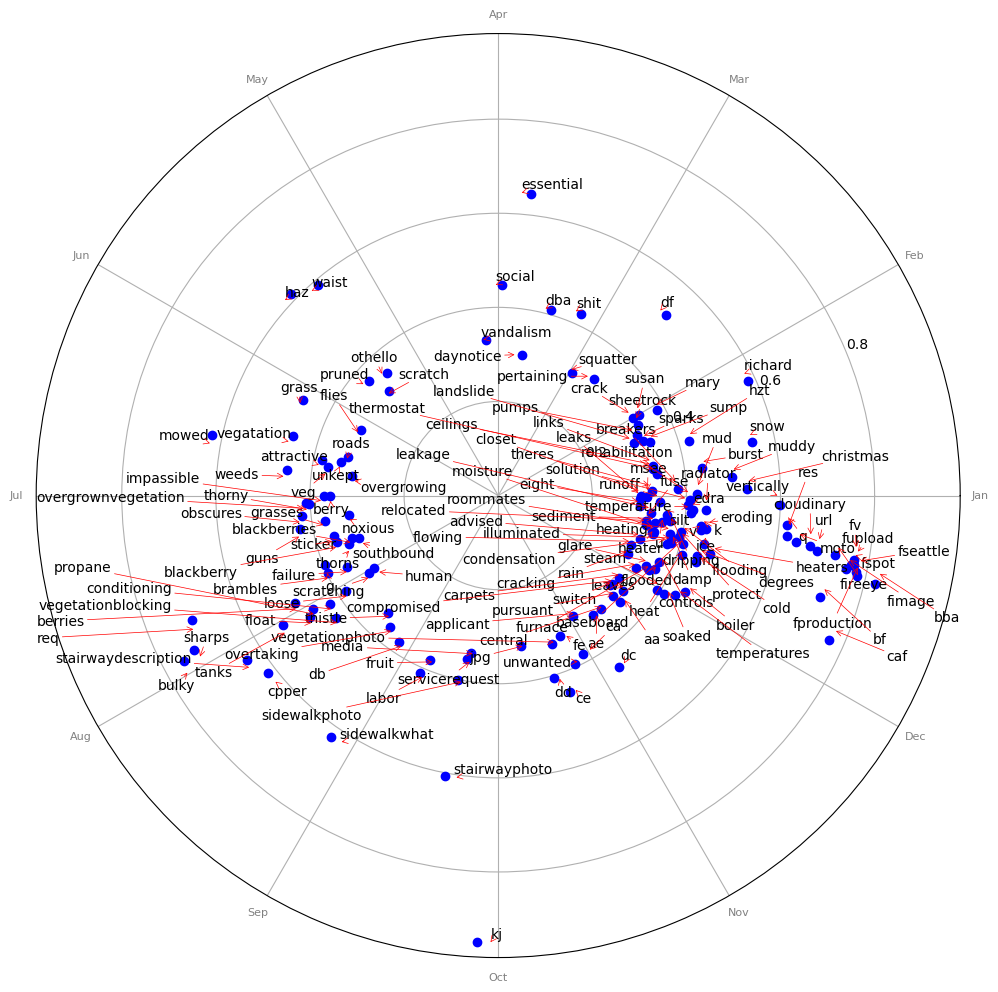

In [319]:
import matplotlib.pyplot as plt
import calendar
from adjustText import adjust_text

plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.xticks(angles, calendar.month_abbr[1:], color='grey', size=8)

# exclude month names / abbreviations
exclude = (
    [m.lower() for m in calendar.month_name]
    + [m.lower() for m in calendar.month_abbr]
    + ["sept"]
)

texts = []

for word in common_words:
    if word in exclude: continue
    (angle, radius) = seasonality(word_stats(word))
    if radius < 0.3: continue
    ax.plot(angle, radius, "bo")
    texts.append(ax.text(angle + 0.03, radius, word))
    
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.show()

In [ ]:
# OK I think that's enough for now